In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# ignore warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
path = ('DatasetAfricaMalaria.csv')
data = pd.read_csv(path)
data.head()

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)


In [3]:
data.shape

(594, 27)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 27 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Country Name                                                                             594 non-null    object 
 1   Year                                                                                     594 non-null    int64  
 2   Country Code                                                                             594 non-null    object 
 3   Incidence of malaria (per 1,000 population at risk)                                      550 non-null    float64
 4   Malaria cases reported                                                                   550 non-null    float64
 5   Use of insecticide-treated bed nets (% of under-5 population)   

In [5]:
# checking the percentage of missing values for each column
def missing(dff):
    print(round((dff.isnull().sum()*100 / len(dff)),2).sort_values(ascending=False))
    
missing(data)

People using safely managed drinking water services, rural (% of rural population)         85.19
People using safely managed drinking water services (% of population)                      83.33
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      82.15
People using safely managed sanitation services, rural (% of rural population)             81.48
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    79.46
People using safely managed sanitation services, urban  (% of urban population)            77.78
People using safely managed sanitation services (% of population)                          77.78
Use of insecticide-treated bed nets (% of under-5 population)                              77.78
People using safely managed drinking water services, urban (% of urban population)         70.37
Malaria cases reported                                                                      7.41
Incidence of malaria (per 1,00

In [6]:
# defining a function passing dataframe and threshold of missing values
def missingvaluecol(dff, threshold):
    l = []
    l = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index)) >= threshold))].columns, 1).columns.values)
    print('# Columns having more than %s percent missing values: '%threshold, (dff.shape[1] - len(l)))
    print('Columns:\n', list(set(list((dff.columns.values))) - set(l)))
    return l

missingvaluecol(data, 50) #threshold 50 here means we are dropping columns with more than 50% missing values

# Columns having more than 50 percent missing values:  9
Columns:
 ['Children with fever receiving antimalarial drugs (% of children under age 5 with fever)', 'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)', 'People using safely managed drinking water services, rural (% of rural population)', 'People using safely managed sanitation services, urban  (% of urban population)', 'People using safely managed drinking water services (% of population)', 'People using safely managed sanitation services (% of population)', 'People using safely managed sanitation services, rural (% of rural population)', 'Use of insecticide-treated bed nets (% of under-5 population)', 'People using safely managed drinking water services, urban (% of urban population)']


['Country Name',
 'Year',
 'Country Code',
 'Incidence of malaria (per 1,000 population at risk)',
 'Malaria cases reported',
 'Rural population (% of total population)',
 'Rural population growth (annual %)',
 'Urban population (% of total population)',
 'Urban population growth (annual %)',
 'People using at least basic drinking water services (% of population)',
 'People using at least basic drinking water services, rural (% of rural population)',
 'People using at least basic drinking water services, urban (% of urban population)',
 'People using at least basic sanitation services (% of population)',
 'People using at least basic sanitation services, rural (% of rural population)',
 'People using at least basic sanitation services, urban  (% of urban population)',
 'latitude',
 'longitude',
 'geometry']

In [7]:
# Creating a new dataframe excluding columns with missing value threshold defined
l = missingvaluecol(data, 50)
df = data[l]

# Columns having more than 50 percent missing values:  9
Columns:
 ['Children with fever receiving antimalarial drugs (% of children under age 5 with fever)', 'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)', 'People using safely managed drinking water services, rural (% of rural population)', 'People using safely managed sanitation services, urban  (% of urban population)', 'People using safely managed drinking water services (% of population)', 'People using safely managed sanitation services (% of population)', 'People using safely managed sanitation services, rural (% of rural population)', 'Use of insecticide-treated bed nets (% of under-5 population)', 'People using safely managed drinking water services, urban (% of urban population)']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 18 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Country Name                                                                        594 non-null    object 
 1   Year                                                                                594 non-null    int64  
 2   Country Code                                                                        594 non-null    object 
 3   Incidence of malaria (per 1,000 population at risk)                                 550 non-null    float64
 4   Malaria cases reported                                                              550 non-null    float64
 5   Rural population (% of total population)                                            588 non-null   

In [9]:
df.describe()

,Year,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude
count,594.000000,550.000000,5.500000e+02,588.000000,588.000000,588.000000,588.000000,588.000000,566.000000,566.000000,588.000000,566.000000,566.000000,594.000000,594.000000
mean,2012.000000,190.087491,1.068330e+06,56.836650,1.389371,43.164116,3.523061,65.994915,51.449576,84.268498,39.469796,28.077208,48.088375,2.828796,17.342546
std,3.164943,163.054527,2.192802e+06,18.086328,1.199693,18.086118,1.456244,17.283361,18.927868,9.307285,26.304934,24.046725,21.802128,15.678226,20.041257
min,2007.000000,0.000000,0.000000e+00,11.020000,-3.450000,9.860000,-4.650000,28.960000,17.050000,52.010000,4.990000,1.890000,12.580000,-30.559482,-24.013197
25%,2009.000000,30.857500,2.211750e+03,43.057500,0.410000,28.795000,2.512500,52.375000,37.075000,78.080000,18.197500,8.842500,30.775000,-6.369028,0.824782
50%,2012.000000,174.775000,1.130260e+05,58.445000,1.675000,41.560000,3.730000,64.470000,50.435000,85.420000,32.555000,18.815000,44.695000,6.744051,18.611308
75%,2015.000000,347.637500,1.154808e+06,71.205000,2.130000,56.945000,4.450000,79.165000,62.245000,90.082500,54.810000,38.082500,58.845000,12.862807,31.465866
max,2017.000000,585.540000,1.682113e+07,90.140000,7.090000,88.980000,7.400000,99.870000,99.830000,99.920000,100.000000,95.180000,98.300000,33.886917,57.552152


In [10]:
df.isna().sum()

Country Name                                                                           0
Year                                                                                   0
Country Code                                                                           0
Incidence of malaria (per 1,000 population at risk)                                   44
Malaria cases reported                                                                44
Rural population (% of total population)                                               6
Rural population growth (annual %)                                                     6
Urban population (% of total population)                                               6
Urban population growth (annual %)                                                     6
People using at least basic drinking water services (% of population)                  6
People using at least basic drinking water services, rural (% of rural population)    28
People using at least

In [11]:
df['Incidence of malaria (per 1,000 population at risk)'] = df['Incidence of malaria (per 1,000 population at risk)'].fillna(df['Incidence of malaria (per 1,000 population at risk)'].mean())
df['Malaria cases reported'] = df['Malaria cases reported'].fillna(df['Malaria cases reported'].mean())
df['Rural population (% of total population)'] = df['Rural population (% of total population)'].fillna(df['Rural population (% of total population)'].mean())
df['Rural population growth (annual %)'] = df['Rural population growth (annual %)'].fillna(df['Rural population growth (annual %)'].mean())
df['Urban population (% of total population)'] = df['Urban population (% of total population)'].fillna(df['Urban population (% of total population)'].mean())
df['Urban population growth (annual %)'] = df['Urban population growth (annual %)'].fillna(df['Urban population growth (annual %)'].mean())
df['People using at least basic drinking water services (% of population)'] = df['People using at least basic drinking water services (% of population)'].fillna(df['People using at least basic drinking water services (% of population)'].mean())
df['People using at least basic drinking water services, rural (% of rural population)'] = df['People using at least basic drinking water services, rural (% of rural population)'].fillna(df['People using at least basic drinking water services, rural (% of rural population)'].mean())
df['People using at least basic drinking water services, urban (% of urban population)'] = df['People using at least basic drinking water services, urban (% of urban population)'].fillna(df['People using at least basic drinking water services, urban (% of urban population)'].mean())
df['People using at least basic sanitation services (% of population)'] = df['People using at least basic sanitation services (% of population)'].fillna(df['People using at least basic sanitation services (% of population)'].mean())
df['People using at least basic sanitation services, rural (% of rural population)'] = df['People using at least basic sanitation services, rural (% of rural population)'].fillna(df['People using at least basic sanitation services, rural (% of rural population)'].mean())
df['People using at least basic sanitation services, urban  (% of urban population)'] = df['People using at least basic sanitation services, urban  (% of urban population)'].fillna(df['People using at least basic sanitation services, urban  (% of urban population)'].mean())

In [12]:
df.drop('geometry', axis=1, inplace=True)

In [13]:
df.isna().sum()

Country Name                                                                          0
Year                                                                                  0
Country Code                                                                          0
Incidence of malaria (per 1,000 population at risk)                                   0
Malaria cases reported                                                                0
Rural population (% of total population)                                              0
Rural population growth (annual %)                                                    0
Urban population (% of total population)                                              0
Urban population growth (annual %)                                                    0
People using at least basic drinking water services (% of population)                 0
People using at least basic drinking water services, rural (% of rural population)    0
People using at least basic drin

### Exploratory Data Analysis

#### Univariate Analysis

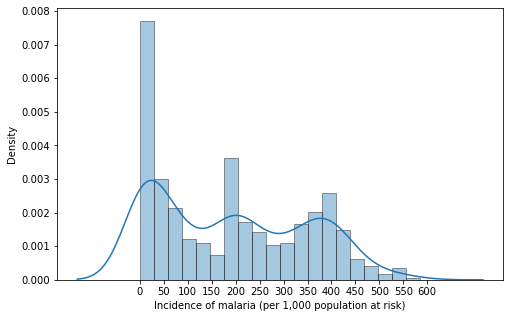

In [14]:
plt.figure(figsize = (8, 5))
sns.distplot(df['Incidence of malaria (per 1,000 population at risk)'], kde=True, hist_kws=dict(edgecolor='k', linewidth=1), bins=20)
plt.xticks(range(0, 601, 50))
plt.show()

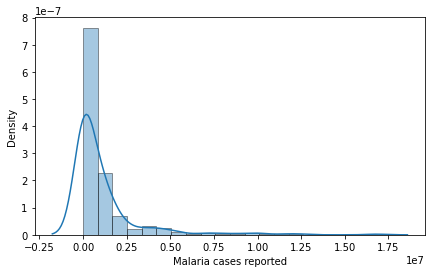

In [15]:
plt.figure(figsize = (7, 4))
sns.distplot(df['Malaria cases reported'], kde=True, hist_kws=dict(edgecolor='k', linewidth=1), bins=20)

plt.show()

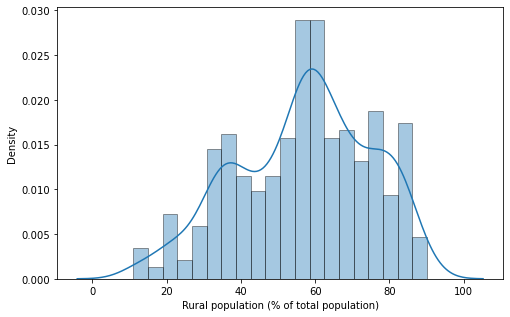

In [16]:
plt.figure(figsize = (8, 5))
sns.distplot(df['Rural population (% of total population)'], kde=True, hist_kws=dict(edgecolor='k', linewidth=1), bins=20)
plt.show()

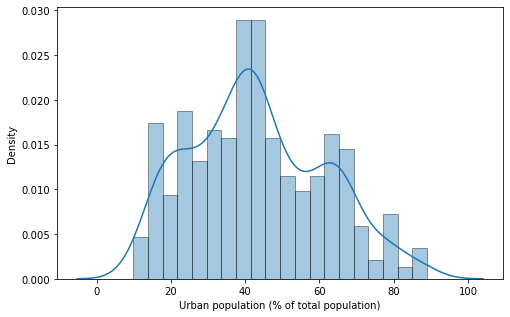

In [17]:
plt.figure(figsize = (8, 5))
sns.distplot(df['Urban population (% of total population)'], kde=True, hist_kws=dict(edgecolor='k', linewidth=1), bins=20)
plt.show()

<AxesSubplot:xlabel='Incidence of malaria (per 1,000 population at risk)'>

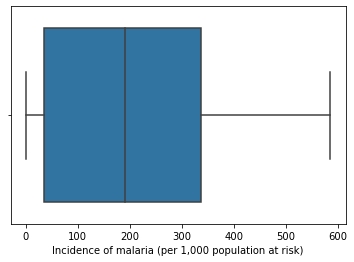

In [18]:
sns.boxplot(data=df, x = df['Incidence of malaria (per 1,000 population at risk)'])

<AxesSubplot:xlabel='Malaria cases reported'>

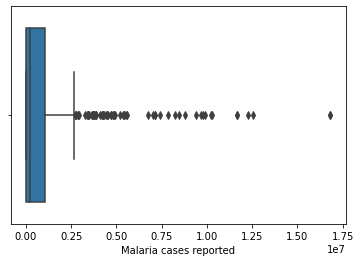

In [19]:
sns.boxplot(data=df, x = df['Malaria cases reported'])

In [20]:
# Bivariate analysis

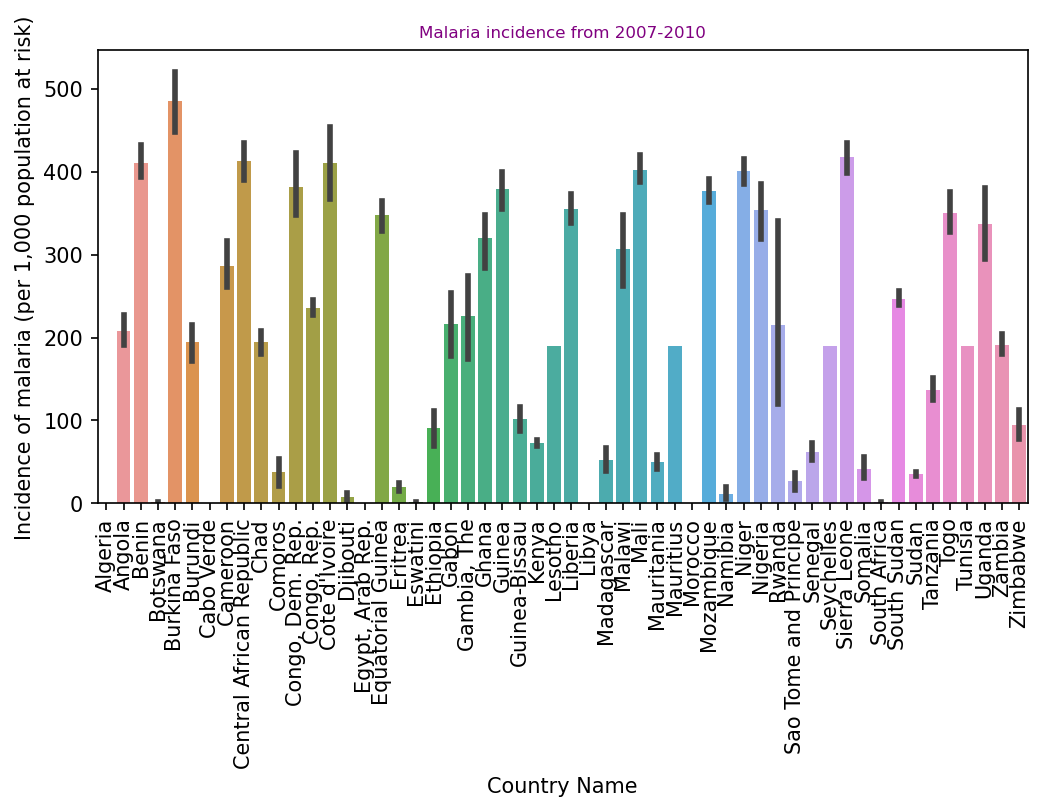

In [21]:
plt.figure(figsize=(8, 4), dpi=150)
sns.barplot(data = df, x= df['Country Name'], y=df['Incidence of malaria (per 1,000 population at risk)'])
plt.title('Malaria incidence from 2007-2010', fontdict={'fontsize': 8,
                                                       'color': 'purple'})
plt.xticks(rotation=90)

plt.show()

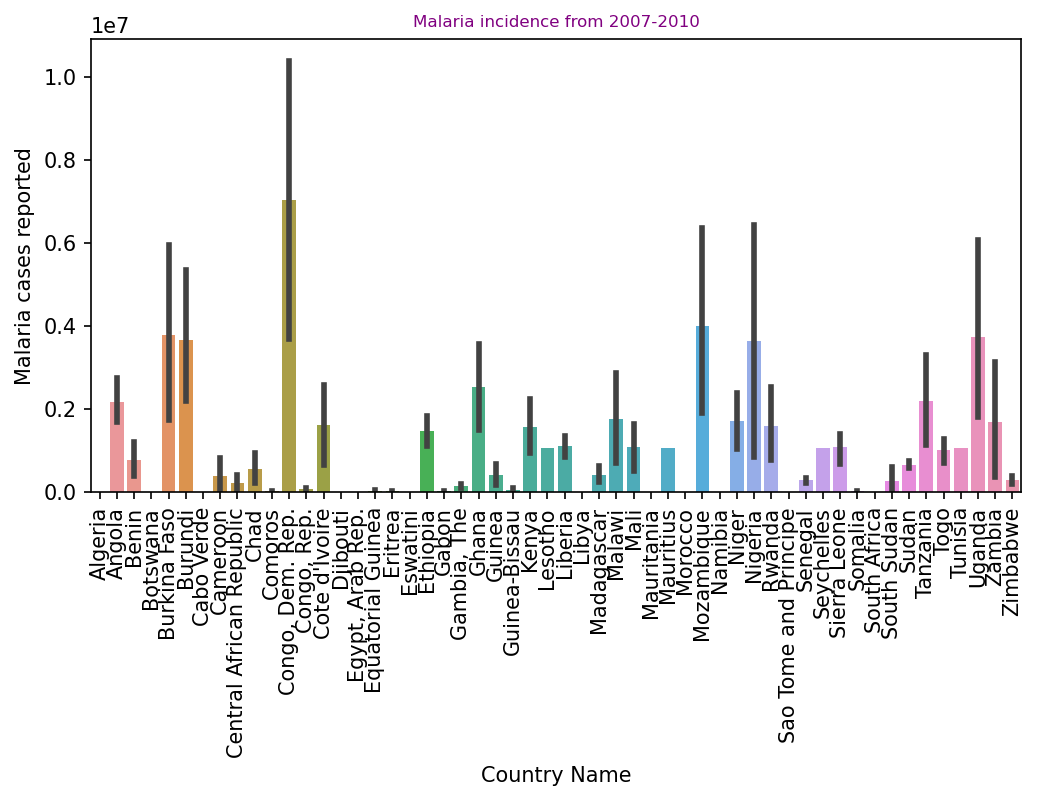

In [22]:
plt.figure(figsize=(8, 4), dpi=150)
sns.barplot(data = df, x= df['Country Name'], y=df['Malaria cases reported'])
plt.title('Malaria incidence from 2007-2010', fontdict={'fontsize': 8,
                                                       'color': 'purple'})
plt.xticks(rotation=90)

plt.show()

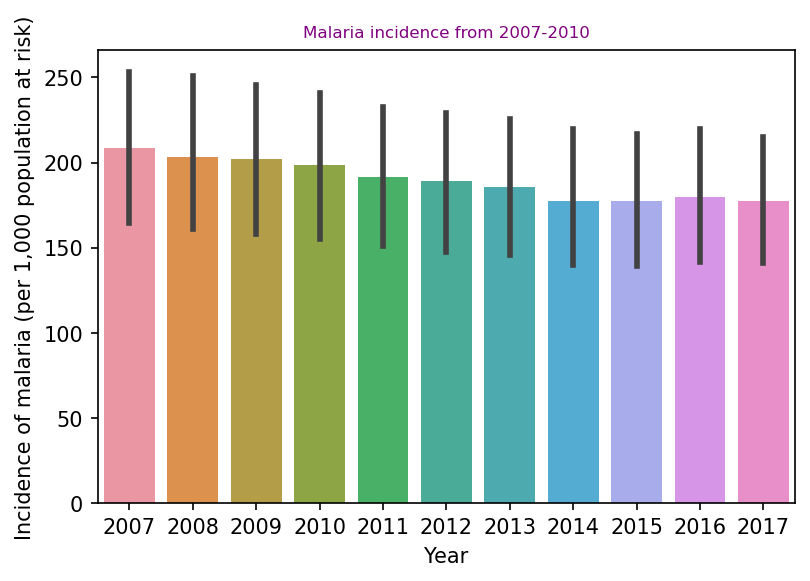

In [23]:
plt.figure(figsize=(6, 4), dpi=150)
sns.barplot(data = df, x= df['Year'], y=df['Incidence of malaria (per 1,000 population at risk)'])
plt.title('Malaria incidence from 2007-2010', fontdict={'fontsize': 8,
                                                       'color': 'purple'})

plt.show()

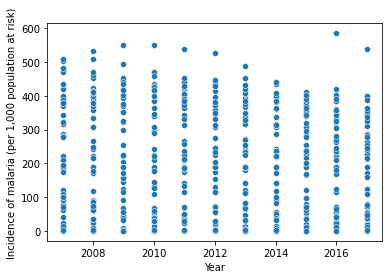

In [24]:
sns.scatterplot(data=df, x = df['Year'], y = df['Incidence of malaria (per 1,000 population at risk)']);

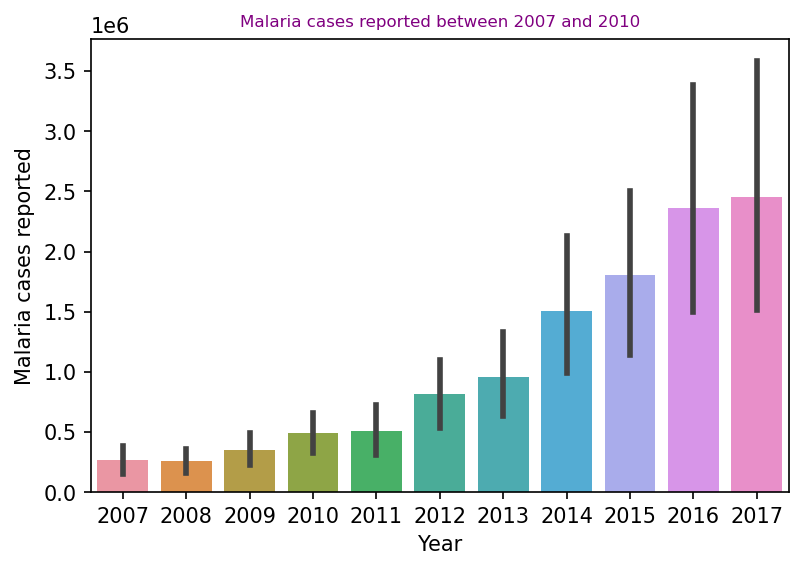

In [25]:
plt.figure(figsize=(6, 4), dpi=150)
sns.barplot(data = df, x= df['Year'], y=df['Malaria cases reported'])
plt.title('Malaria cases reported between 2007 and 2010', fontdict={'fontsize': 8,
                                                       'color': 'purple'})

plt.show()

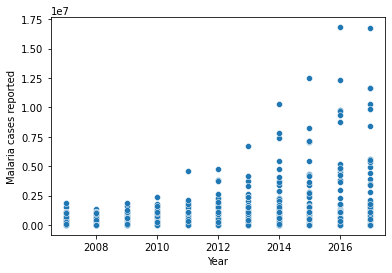

In [26]:
sns.scatterplot(data=df, x = df['Year'], y = df['Malaria cases reported']);

In [27]:
# Remove the outlier